In [1]:
# 코딩에 필요한 라이브러리 호출
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [9]:
#각 블럭 생성
def block():
    b=[random.randint(1,3),random.randint(1,3),random.randint(1,3)]
    return b

In [10]:
#결합 보드 생성
#block()에서 만든 9개의 블럭을 모아서 list로 반환
def GameBoard():
    GB=[]
    GB.append(block())
    while len(GB)<9:
        a=block()
        if a not in GB:
            GB.append(a)
    return GB
# [A,B,C]
# A=   빨-1   파-2    노-3
# B= 세모-1 네모-2 동그라미-3
# C=  검-1   회-2    흰-3

In [11]:
#각 블럭을 대입하면 색,모양,바탕색을 반환하는 함수
def block_change(a : list):
    
    b = []
    
    if a[0] == 1: b.append("Red")
    elif a[0] == 2: b.append("Blue")
    else : b.append("Yellow")
    
    if a[1] == 1: b.append("Polygon")
    elif a[1] == 2: b.append("Rectangle")
    else : b.append("Circle")
    
    if a[2] == 1: b.append("Black")
    elif a[2] == 2: b.append("Gray")
    else : b.append("White")
    
    return b

In [12]:
#합인지 검사해주는 함수
#각 요소의 합이 3의 배수이면 모두 같은 모양이나 색깔임을 이용
def is_hab(a):
    for i in range(3):
        if (a[0][i] + a[1][i] + a[2][i])%3 != 0:
            return False
    return True

In [13]:
#board에서 모든 합의 리스트를 반환하는 함수
from itertools import combinations

def list_hab(board):
    dataset = list(combinations(board, 3))
    hab_list = []
    for data in dataset:
        if is_hab(data): hab_list.append(list(data))
    return hab_list

In [14]:
#정답지 만들기
#a 에 list_hab(G) 대입
def list_hab_answer(a:list):
    hab_answer_final=[]
    hab_answer=[]
    for i in range(len(a)):
        if len(hab_answer)>1: 
            hab_answer_final.append(hab_answer)
        hab_answer=[]
        for j in range(3):
            hab_answer.append(G.index(a[i][j])+1)
    hab_answer_final.append(hab_answer)
    return hab_answer_final

결합게임입니다.
합 하나당 +1점, 결 찾으면 +3점, 틀릴경우 -1점입니다.
만약 합을 찾았다면 각 자리의 숫자를 입력해주세요.
ex) 1 3 4
더이상 합이 없다면 0이라고 입력해주세요.


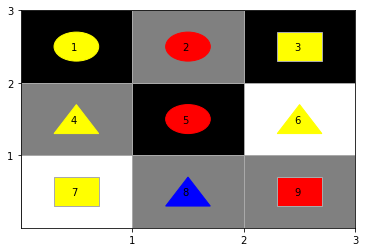

혼자 연습하기->1/친구와 대결하기->2:2
player1의 턴입니다. 3자리 숫자를 입력해주세요. (만약 합이 더이상 없다면 0을 입력) : 1 3 5
합이 아닙니다. 현재점수는 (player1)-0//(player2)-0입니다.


In [ ]:
#intro

print("결합게임입니다.")
print("합 하나당 +1점, 결 찾으면 +3점, 틀릴경우 -1점입니다.")
print("만약 합을 찾았다면 각 자리의 숫자를 입력해주세요.")
print("ex) 1 3 4")
print("더이상 합이 없다면 0이라고 입력해주세요.")

pt = 0
pt1=0
pt2=0
turn=0
global G
G= GameBoard()
correct_list = list_hab(G)
answer=[]

#게임판 생성
fig, ax = plt.subplots()
ax.set_yticks(np.arange(1, 4))
ax.set_xticks(np.arange(1, 4))             
for i in range(9):
    ax.add_patch(
       patches.Rectangle(
          (i%3,2-(i//3)),                
          1, 1,                   
          edgecolor = 'darkgray',
          facecolor = "%s"%(block_change(G[i])[2]),
          fill=True,
       ))
for i in range(9):
    if G[i][1]==3:
        ax.add_patch(
           patches.Circle(
              (i%3+0.5,2-(i//3)+0.5),                
              radius=0.2,                   
              color = "%s"%(block_change(G[i])[0]),
              fill=True,
           ))
for i in range(9):
    if G[i][1]==2:
        ax.add_patch(
           patches.Rectangle(
              (i%3+0.3,2-(i//3)+0.3),                   
              0.4,0.4,                    
              edgecolor = 'darkgray',
               facecolor = "%s"%(block_change(G[i])[0]),
              fill=True,
           ))
for i in range(9):
    if G[i][1]==1:
        ax.add_patch(
           patches.Polygon(
              ((i%3+0.3,2-(i//3)+0.3),(i%3+0.7,2-(i//3)+0.3),(i%3+0.5,2-(i//3)+0.7)),                  
              color = "%s"%(block_change(G[i])[0]),
              fill=True,
           ))
for i in range(9):
    ax.text(i%3+0.45,2-(i//3)+0.45,"%d"%(i+1))
plt.show()
#여기까지가 게임 판 그리기
    

    
mode=int(input("혼자 연습하기->1/친구와 대결하기->2:"))
if mode==1:
    while True:
        a = input("3자리 숫자를 입력해주세요. (만약 합이 더이상 없다면 0을 입력) : ")

        if len(a) == 1:
            if len(correct_list) == 0:
                pt += 3
                print("축하드립니다. 모든 합을 찾아내었군요! 총점수 :", pt)
                break
            else:
                if pt != 0:
                    pt -= 1
                print("땡! 결이 아닙니다. 현재점수 :", pt)

        elif a=="black sheep wall":
            print("★★★관리자 모드입니다.★★★")
            print(list_hab_answer(list_hab(G)))

        else:
            a = list(map(int, a.split()))
            temp = [G[a[0]-1], G[a[1]-1], G[a[2]-1]]
            if is_hab(temp):
                answer.append(a)
                print("■정답리스트■")
                print(answer)
                pt += 1
                print("합! 현재점수 :", pt)
                correct_list.remove(temp)
            else:
                if pt != 0:
                    pt -= 1
                print("■정답리스트■")
                print("합이 아닙니다. 현재점수 :", pt)
elif mode==2:
    while True:
        if turn%2==0:
            a = input("player1의 턴입니다. 3자리 숫자를 입력해주세요. (만약 합이 더이상 없다면 0을 입력) : ")
            if len(a) == 1:
                if len(correct_list) == 0:
                    pt1 += 3
                    print("player1(이) 결을 찾았습니다. 게임을 종료합니다.최종 점수: (player1)-%d//(player2)-%d"%(pt1,pt2))
                    break
                else:
                    if pt1 != 0:
                        pt1 -= 1
                    print("땡! 결이 아닙니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    turn+=1

            elif a=="black sheep wall":
                print("★★★관리자 모드입니다.★★★")
                print(list_hab_answer(list_hab(G)))

            else:
                a = list(map(int, a.split()))
                temp = [G[a[0]-1], G[a[1]-1], G[a[2]-1]]
                if is_hab(temp):
                    answer.append(a)
                    print("■정답리스트■")
                    print(answer)
                    pt1 += 1
                    print("player1(이) 합을 찾았습니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    correct_list.remove(temp)
                    turn+=1
                else:
                    if pt1 != 0:
                        pt1 -= 1
                    print("합이 아닙니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    turn+=1
        elif turn%2==1:
            a = input("player2의 턴입니다. 3자리 숫자를 입력해주세요. (만약 합이 더이상 없다면 0을 입력) : ")
            if len(a) == 1:
                if len(correct_list) == 0:
                    pt2 += 3
                    print("player2(이) 결을 찾았습니다. 게임을 종료합니다. 최종 점수: (player1)-%d//(player2)-%d"%(pt1,pt2))
                    break
                else:
                    if pt2 != 0:
                        pt2 -= 1
                    print("땡! 결이 아닙니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    turn+=1

            elif a=="newjeans":
                print("★★★관리자 모드입니다.★★★")
                print(list_hab_answer(list_hab(G)))

            else:
                a = list(map(int, a.split()))
                temp = [G[a[0]-1], G[a[1]-1], G[a[2]-1]]
                if is_hab(temp):
                    answer.append(a)
                    print("■정답리스트■")
                    print(answer)
                    pt2 += 1
                    print("player2(이) 합을 찾았습니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    correct_list.remove(temp)
                    turn+=1
                else:
                    if pt2 != 0:
                        pt2 -= 1
                    print("합이 아닙니다. 현재점수는 (player1)-%d//(player2)-%d입니다."%(pt1,pt2))
                    turn+=1
        
        
